## Пример с задачей комивояжёра

In [1]:
import pygad
import numpy
from numpy.linalg import norm
import matplotlib.pyplot as plt
import random
%matplotlib inline

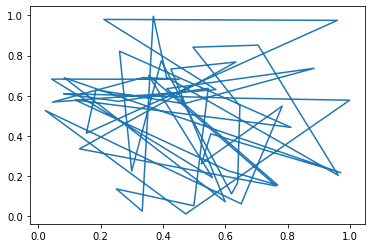

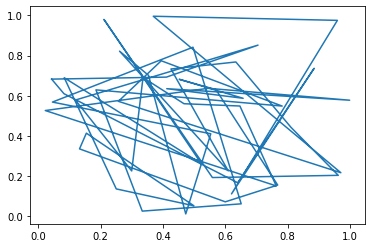

In [7]:
POP_SIZE = 200
POINT_NUM = 50
GEN_NUM = 500

shop_coordinates = numpy.random.uniform(size=(POINT_NUM, 2))

def plot_solution(solution):
    plt.plot(
        *tuple(
            [
                shop_coordinates[solution[i], k]
                for i in list(range(len(solution))) + [0]
            ]
            for k in range(2)
        )
    )

initial_pop = [list(range(POINT_NUM)) for _ in range(POP_SIZE)]
for l in initial_pop:
    random.shuffle(l)

plot_solution(initial_pop[0])
plt.show()
plot_solution(initial_pop[1])

In [4]:
def crossover_func(parents, offspring_size, ga_instance):
    offspring = parents[0].copy() # копия мамы

    # Упорядочим первую половину точек, как у папы
    hps = set(offspring[:POINT_NUM])
    
    newps = []
    for p in parents[1]:
        if p in hps:
            newps.append(p)
    
    offspring[:POINT_NUM] = newps
    return offspring

def mutation_func(offspring, ga_instance):
    i = random.randint(0, len(offspring) - 1)
    j = random.randint(0, len(offspring) - 1)
    offspring[i], offspring[j] = offspring[j], offspring[i]
    return offspring

def fitness_func(solution, solution_idx):
    path = sum(
        norm(
            shop_coordinates[solution[i]] -
            shop_coordinates[solution[(i + 1) % len(solution)]]
        )
        for i in range(len(solution))
    )
    return 1 / path

In [8]:
ga_instance = pygad.GA(
    num_generations=GEN_NUM,
    num_parents_mating=2,
    sol_per_pop=POP_SIZE,
    gene_type=int, # а то сделает всё float
    initial_population=initial_pop,
    fitness_func=fitness_func,
    crossover_type=crossover_func,
    mutation_type=mutation_func
)

In [9]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

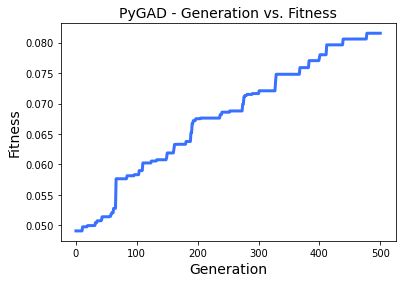

Parameters of the best solution : [21 34 48 14 36 32 20 12  9 33 27 28 30 25 41 10 40  1 17 44 13  2  4 39
 23 47 15  5 43 31 19 49 37 45 38  3 18 11 29  0  7  8 42 35 22  6 24 26
 46 16]
Fitness value of the best solution = 0.08153895948795267
Index of the best solution : 0


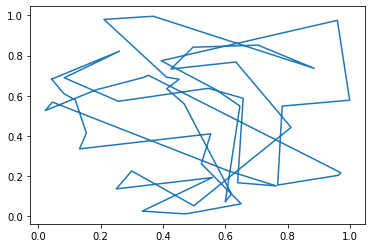

In [10]:
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

plot_solution(solution)